<a href="https://colab.research.google.com/github/cyongkypranowo/DeepLearning-Diabetes-Disease-Prediction/blob/main/DL_Diabetes_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project : Diabetes Disease Prediction
##### Industri : Healthcare

## Objective
Sistem cerdas yang mampu mendeteksi potensi penyakit diabetes pada pasien wanita di Amerika Utara (Pima Indians).

Sumber Data : [link](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

# 1. Business & Data Understanding

## Business Understanding

### Latar Belakang Proyek

Di Indonesia, industri healthcare terus berkembang dan mengintegrasikan teknologi terkini untuk meningkatkan diagnosis dan perawatan. Sistem cerdas untuk prediksi diabetes sangat penting karena dapat memberikan deteksi dini, memungkinkan intervensi lebih cepat untuk mencegah komplikasi serius.

1. **Manfaat** : Deep learning mampu memproses dan belajar dari set data kesehatan yang kompleks, meningkatkan akurasi diagnostik penyakit diabetes dibandingkan metode tradisional. Ini memungkinkan deteksi dini dan lebih akurat dari kondisi prediabetes dan diabetes.
2. **Harapan** : Penelitian ini juga dapat membuka jalan untuk penelitian lebih lanjut dalam penerapan teknologi AI dan machine learning dalam bidang medis lainnya, mendorong inovasi dalam diagnosa dan perawatan penyakit.

### Tujuan Proyek
Untuk mengembangkan dan mengimplementasikan sistem prediksi penyakit diabetes yang akurat dan efisien menggunakan teknologi deep learning, guna meningkatkan deteksi dini dan personalisasi perawatan bagi pasien diabetes.

## Data Understanding

### Deskripsi Dataset

Dataset ini terdiri dari 768 baris dengan 9 kolom, yang mencakup:

* Pregnancies: Jumlah kehamilan.
* Glucose: Konsentrasi glukosa plasma 2 jam dalam tes toleransi glukosa oral.
* BloodPressure: Tekanan darah diastolik (mm Hg).
* SkinThickness: Ketebalan lipatan kulit trisep (mm).
* Insulin: Insulin serum 2 jam (mu U/ml).
* BMI: Indeks massa tubuh (berat dalam kg/(tinggi dalam m)^2).
* DiabetesPedigreeFunction: Fungsi silsilah diabetes, sebuah skor yang * merefleksikan kemungkinan genetik diabetes berdasarkan riwayat keluarga.
* Age: Umur dalam tahun.
* Outcome: Variabel kelas yang menandakan apakah subjek memiliki diabetes (1) atau tidak (0).

In [1]:
!pip install keras-tuner

In [2]:
# Import library
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from kerastuner.tuners import RandomSearch
from kerastuner import HyperModel

<ipython-input-2-cff5ab87a437>:13: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [3]:
# Memuat dataset
df = pd.read_csv('diabetes.csv')

In [4]:
# Menampilkan 5 baris pertama untuk melihat struktur datanya
print("Struktur Data:")
print(df.head(10))

Struktur Data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3               

In [5]:
# Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.0

In [6]:
# Informasi Dataset
print("\nInformasi Dataset:")
df.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Ukuran Dataset
print("\nUkuran Dataset:")
print(df.shape)


Ukuran Dataset:
(768, 9)


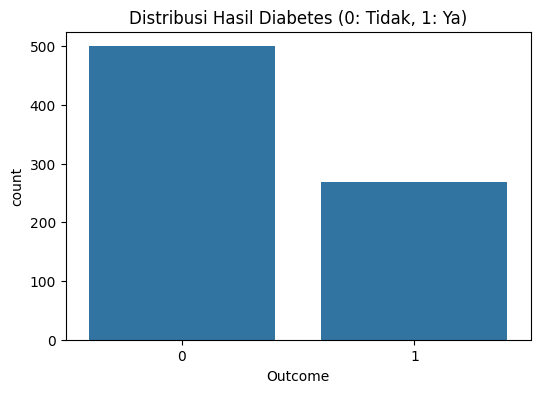

In [8]:
# Distribusi Outcome (Hasil)
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribusi Hasil Diabetes (0: Tidak, 1: Ya)')
plt.show()

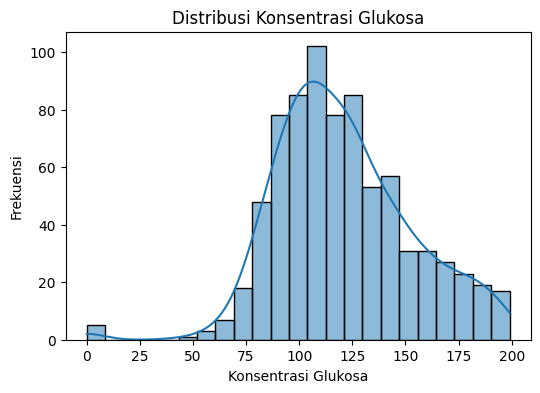

In [9]:
# Distribusi Glukosa
plt.figure(figsize=(6, 4))
sns.histplot(df['Glucose'], kde=True)
plt.title('Distribusi Konsentrasi Glukosa')
plt.xlabel('Konsentrasi Glukosa')
plt.ylabel('Frekuensi')
plt.show()

# 2. Data Cleaning & Analysis

In [10]:
# Kolom yang perlu dihandle nilai 0-nya
columns_to_replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [11]:
# Ganti nilai 0 dengan median
for column in columns_to_replace_zero:
    df[column] = df[column].replace(0, df[column].median())

In [12]:
# Mengecek ulang statistik deskriptif
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Analysis Data
Setelah mengganti nilai 0 dengan median pada kolom **Glucose, BloodPressure, SkinThickness, Insulin, dan BMI**, kita dapat melihat beberapa perubahan dalam statistik deskriptif dataset:

1. **Mean (Rata-rata):**
Rata-rata untuk Glucose, BloodPressure, SkinThickness, Insulin, dan BMI kini lebih mewakili data karena tidak lagi terdampak oleh nilai 0 yang tidak realistis. Misalnya, rata-rata Insulin meningkat dari nilai sebelumnya menjadi 94.65, mengindikasikan penggantian nilai 0 dengan median memberikan representasi yang lebih akurat terhadap distribusi insulin dalam dataset.

2. **Std (Standar Deviasi):**
Standar deviasi untuk kolom yang diubah mengalami penyesuaian, menunjukkan variasi dalam data yang sebenarnya setelah penggantian nilai 0. Perubahan ini penting karena menunjukkan sebaran data yang lebih realistis.

3. **Min (Minimum)**:
Nilai minimum untuk kolom tersebut sekarang lebih realistis dan tidak lagi 0, yang menunjukkan bahwa penggantian nilai telah berhasil mengeliminasi nilai-nilai yang tidak mungkin secara klinis.

4. **Median**:
Median (50%) tidak berubah untuk beberapa kolom karena penggantian nilai 0 dengan median tidak mempengaruhi nilai tengah distribusi, kecuali jika sebagian besar data pada kolom tersebut adalah 0.

5. **Perubahan pada Q1 dan Q3 (Kuartil 1 dan 3):**
Kuartil pertama dan ketiga menunjukkan bagaimana sebaran data terbagi sebelum dan setelah titik median. Perubahan pada kuartil menunjukkan penyesuaian dalam distribusi data setelah nilai 0 diganti.
Analisis ini menunjukkan bahwa penggantian nilai 0 dengan median telah membantu dalam memperbaiki kualitas dataset dengan mengeliminasi nilai-nilai yang tidak mungkin secara klinis, yang dapat meningkatkan kinerja model prediktif yang akan dibangun

## Transformation Data

In [13]:
# Membagi dataset menjadi fitur dan target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Data Modeling & Experiment Arsitektur Neural Network


## Narrow Shallow Model
(Memiliki sedikit lapisan dan sedikit
neuron per lapisan)

In [14]:
model_ns = Sequential()
model_ns.add(Dense(units=2, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_ns.add(Dense(units=1, activation='sigmoid'))

model_ns.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model_ns.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)
model_ns.summary()

loss, accuracy = model_ns.evaluate(X_test_scaled, y_test)

Epoch 1/100
16/16 [==============================] - 1s 20ms/step - loss: 0.7428 - accuracy: 0.7026 - val_loss: 0.7289 - val_accuracy: 0.6911
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.7269 - accuracy: 0.7088 - val_loss: 0.7126 - val_accuracy: 0.6911
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.7103 - accuracy: 0.7088 - val_loss: 0.6984 - val_accuracy: 0.7154
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6954 - accuracy: 0.7067 - val_loss: 0.6850 - val_accuracy: 0.7073
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6810 - accuracy: 0.7047 - val_loss: 0.6732 - val_accuracy: 0.7154
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6677 - accuracy: 0.7026 - val_loss: 0.6612 - val_accuracy: 0.6992
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6549 - accuracy: 0.7026 - val_loss: 0.6512 - val_accuracy: 0.6911
Epoch 8/100


## Narrow Wide Model
(Memiliki sedikit lapisan tetapi dengan
lebih banyak neuron per lapisan)

In [15]:
model_nw = Sequential()
model_nw.add(Dense(units=128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_nw.add(Dense(units=1, activation='sigmoid'))

model_nw.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model_nw.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)
model_nw.summary()

loss, accuracy = model_nw.evaluate(X_test_scaled, y_test)

Epoch 1/100
16/16 [==============================] - 3s 39ms/step - loss: 0.6497 - accuracy: 0.6741 - val_loss: 0.6026 - val_accuracy: 0.6992
Epoch 2/100
16/16 [==============================] - 0s 18ms/step - loss: 0.5604 - accuracy: 0.7495 - val_loss: 0.5471 - val_accuracy: 0.7073
Epoch 3/100
16/16 [==============================] - 0s 16ms/step - loss: 0.5135 - accuracy: 0.7617 - val_loss: 0.5164 - val_accuracy: 0.7317
Epoch 4/100
16/16 [==============================] - 0s 13ms/step - loss: 0.4885 - accuracy: 0.7678 - val_loss: 0.4980 - val_accuracy: 0.7317
Epoch 5/100
16/16 [==============================] - 0s 19ms/step - loss: 0.4721 - accuracy: 0.7739 - val_loss: 0.4864 - val_accuracy: 0.7398
Epoch 6/100
16/16 [==============================] - 0s 24ms/step - loss: 0.4619 - accuracy: 0.7760 - val_loss: 0.4800 - val_accuracy: 0.7398
Epoch 7/100
16/16 [==============================] - 0s 26ms/step - loss: 0.4534 - accuracy: 0.7841 - val_loss: 0.4742 - val_accuracy: 0.7642
Epoch 

## Deep And Shallow
(Memiliki sedikit lapisan tetapi dengan
lebih banyak neuron per lapisan)

In [16]:
model_ds = Sequential()
model_ds.add(Dense(units=4, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_ds.add(Dense(units=4, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_ds.add(Dense(units=2, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_ds.add(Dense(units=2, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_ds.add(Dense(units=1, activation='sigmoid'))

model_ds.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model_ds.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)
model_ds.summary()

loss, accuracy = model_ds.evaluate(X_test_scaled, y_test)

Epoch 1/100
16/16 [==============================] - 1s 16ms/step - loss: 0.6792 - accuracy: 0.6640 - val_loss: 0.6818 - val_accuracy: 0.6098
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6724 - accuracy: 0.6640 - val_loss: 0.6760 - val_accuracy: 0.6098
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6646 - accuracy: 0.6640 - val_loss: 0.6692 - val_accuracy: 0.6098
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6554 - accuracy: 0.6640 - val_loss: 0.6616 - val_accuracy: 0.6098
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6450 - accuracy: 0.6640 - val_loss: 0.6527 - val_accuracy: 0.6098
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6339 - accuracy: 0.6640 - val_loss: 0.6431 - val_accuracy: 0.6098
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6209 - accuracy: 0.6640 - val_loss: 0.6329 - val_accuracy: 0.6098
Epoch 8/100


## Deep And Wide
(Memiliki kombinasi banyak lapisan dan
banyak neuron per lapisan)

In [17]:
model_dw = Sequential()
model_dw.add(Dense(units=128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_dw.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_dw.add(Dense(units=32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_dw.add(Dense(units=16, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_dw.add(Dense(units=8, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_dw.add(Dense(units=4, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_dw.add(Dense(units=2, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_dw.add(Dense(units=1, activation='sigmoid'))

model_dw.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_dw.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)
model_dw.summary()

loss, accuracy = model_dw.evaluate(X_test_scaled, y_test)

Epoch 1/100
16/16 [==============================] - 2s 19ms/step - loss: 0.6901 - accuracy: 0.6415 - val_loss: 0.6817 - val_accuracy: 0.7236
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6715 - accuracy: 0.7475 - val_loss: 0.6535 - val_accuracy: 0.7398
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6559 - accuracy: 0.7495 - val_loss: 0.6457 - val_accuracy: 0.7480
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6393 - accuracy: 0.7821 - val_loss: 0.6296 - val_accuracy: 0.7561
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6268 - accuracy: 0.7902 - val_loss: 0.6244 - val_accuracy: 0.7724
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6193 - accuracy: 0.8024 - val_loss: 0.6216 - val_accuracy: 0.7724
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6078 - accuracy: 0.7984 - val_loss: 0.6234 - val_accuracy: 0.7480
Epoch 8/100


## Hyperparameter Tuning Experiment

### Random Search

#### Narrow Shallow Model

(Memiliki sedikit lapisan dan sedikit
neuron per lapisan)

In [18]:
class NarrowShallowModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units_1', min_value=4, max_value=32, step=4),
                        activation='relu', input_shape=(self.input_shape,)))
        model.add(Dense(units=hp.Int('units_2', min_value=4, max_value=16, step=4),
                        activation='relu'))
        # Lapisan output
        model.add(Dense(1, activation='sigmoid'))

        # Kompilasi model
        model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model


# Definisikan model hypermodel
hypermodel = NarrowShallowModel(input_shape=X_train_scaled.shape[1])

# Setup RandomSearch tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='narrow_shallow_tuning'
)

# Jalankan pencarian hyperparameter
tuner.search(X_train_scaled, y_train, epochs=20, validation_split=0.2)

# Dapatkan model terbaik
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluasi model terbaik
loss, accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f'Best model loss: {loss}, accuracy: {accuracy}')


Trial 10 Complete [00h 00m 03s]
val_accuracy: 0.39024388790130615

Best val_accuracy So Far: 0.8048780560493469
Total elapsed time: 00h 00m 34s
5/5 [==============================] - 0s 4ms/step - loss: 0.5756 - accuracy: 0.7338
Best model loss: 0.5755832195281982, accuracy: 0.7337662577629089


#### Narrow Wide Model
(Memiliki sedikit lapisan tetapi dengan
lebih banyak neuron per lapisan)

In [19]:
class NarrowWideModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units_1', min_value=64, max_value=512, step=64),
                        activation='relu', input_shape=(self.input_shape,)))
        model.add(Dense(units=hp.Int('units_2', min_value=16, max_value=128, step=16),
                        activation='relu'))
        # Lapisan output
        model.add(Dense(1, activation='sigmoid'))

        # Kompilasi model
        model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model


# Definisikan model hypermodel
hypermodel = NarrowWideModel(input_shape=X_train_scaled.shape[1])

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='narrow_wide_tuning'
)

tuner.search(X_train_scaled, y_train, epochs=20, validation_split=0.2)

# Dapatkan model terbaik
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluasi model terbaik
loss, accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f'Best model loss: {loss}, accuracy: {accuracy}')


Trial 10 Complete [00h 00m 06s]
val_accuracy: 0.7560975551605225

Best val_accuracy So Far: 0.7886179089546204
Total elapsed time: 00h 00m 40s
5/5 [==============================] - 0s 4ms/step - loss: 0.5203 - accuracy: 0.7338
Best model loss: 0.5203132033348083, accuracy: 0.7337662577629089


#### Deep Shalow Model
(Memiliki banyak lapisan tetapi sedikit
neuron per lapisan)

In [20]:
class DeepShallowModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        # Lapisan input dan lapisan tersembunyi pertama dengan unit lebih banyak (deep)
        model.add(Dense(
            units=hp.Int('units_1', min_value=128, max_value=512, step=64),
            activation='relu',
            input_shape=(self.input_shape,)
        ))
        # Menambahkan beberapa lapisan tersembunyi tambahan dengan unit bertahap lebih sedikit (shallow)
        for i in range(2, hp.Int('num_layers', 2, 4)):  # Menambahkan 1-2 lapisan tersembunyi tambahan
            model.add(Dense(
                units=hp.Int(f'units_{i}', min_value=16, max_value=128, step=16, parent_name='units_1', parent_values=[128, 192, 256, 320, 384, 448, 512]),
                activation='relu'
            ))
        # Lapisan output
        model.add(Dense(1, activation='sigmoid'))

        # Kompilasi model
        model.compile(
            optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        return model


hypermodel = DeepShallowModel(input_shape=X_train_scaled.shape[1])

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='deep_shallow_tuning',
    project_name='diabetes_prediction_deep_shallow'
)

tuner.search(X_train_scaled, y_train, epochs=20, validation_split=0.2)

best_model = tuner.get_best_models(num_models=1)[0]

loss, accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f'Best model loss: {loss}, accuracy: {accuracy}')

Reloading Tuner from deep_shallow_tuning/diabetes_prediction_deep_shallow/tuner0.json


5/5 [==============================] - 0s 4ms/step - loss: 0.4921 - accuracy: 0.7662
Best model loss: 0.4921472668647766, accuracy: 0.7662337422370911


#### Deep Wide Model
(Memiliki kombinasi banyak lapisan dan
banyak neuron per lapisan)

In [21]:
class DeepAndWideModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        # Lapisan input dan lapisan tersembunyi pertama yang "wide"
        model.add(Dense(
            units=hp.Int('units_1', min_value=128, max_value=512, step=64),
            activation='relu',
            input_shape=(self.input_shape,)
        ))
        # Menambahkan beberapa lapisan tersembunyi "deep"
        for i in range(2, hp.Int('num_layers', 3, 5)):  # Menambahkan 2-4 lapisan tersembunyi tambahan
            model.add(Dense(
                units=hp.Int(f'units_{i}', min_value=64, max_value=256, step=32),
                activation='relu'
            ))
        # Lapisan output
        model.add(Dense(1, activation='sigmoid'))

        # Kompilasi model
        model.compile(
            optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        return model


hypermodel = DeepAndWideModel(input_shape=X_train_scaled.shape[1])

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='deep_wide_tuning',
    project_name='diabetes_prediction_deep_wide'
)

# Mulai pencarian hyperparameter
tuner.search(X_train_scaled, y_train, epochs=20, validation_split=0.2)

# Dapatkan dan evaluasi model terbaik
best_model = tuner.get_best_models(num_models=1)[0]
loss, accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f'Best model loss: {loss}, accuracy: {accuracy}')

Reloading Tuner from deep_wide_tuning/diabetes_prediction_deep_wide/tuner0.json


5/5 [==============================] - 0s 5ms/step - loss: 0.7578 - accuracy: 0.7143
Best model loss: 0.7578365802764893, accuracy: 0.7142857313156128
